In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight 
from classification_utilities import display_cm, display_adj_cm
from ReadData import *
from Accuracy import accuracy, accuracy_adjacent

In [2]:
%cd ./logs
from log_well import *
%cd ../

d:\texas_data_set\Regularize\logs
d:\texas_data_set\Regularize


In [3]:
well_number1, well_number2, well_number3, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9, well_number10, well_number11, well_number12, WellName = ReadData()

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


1
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


2
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


3
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


4
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


5
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


6
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


7
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


8
/////////////////////////////


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\1032942808.py:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,100])


9
/////////////////////////////


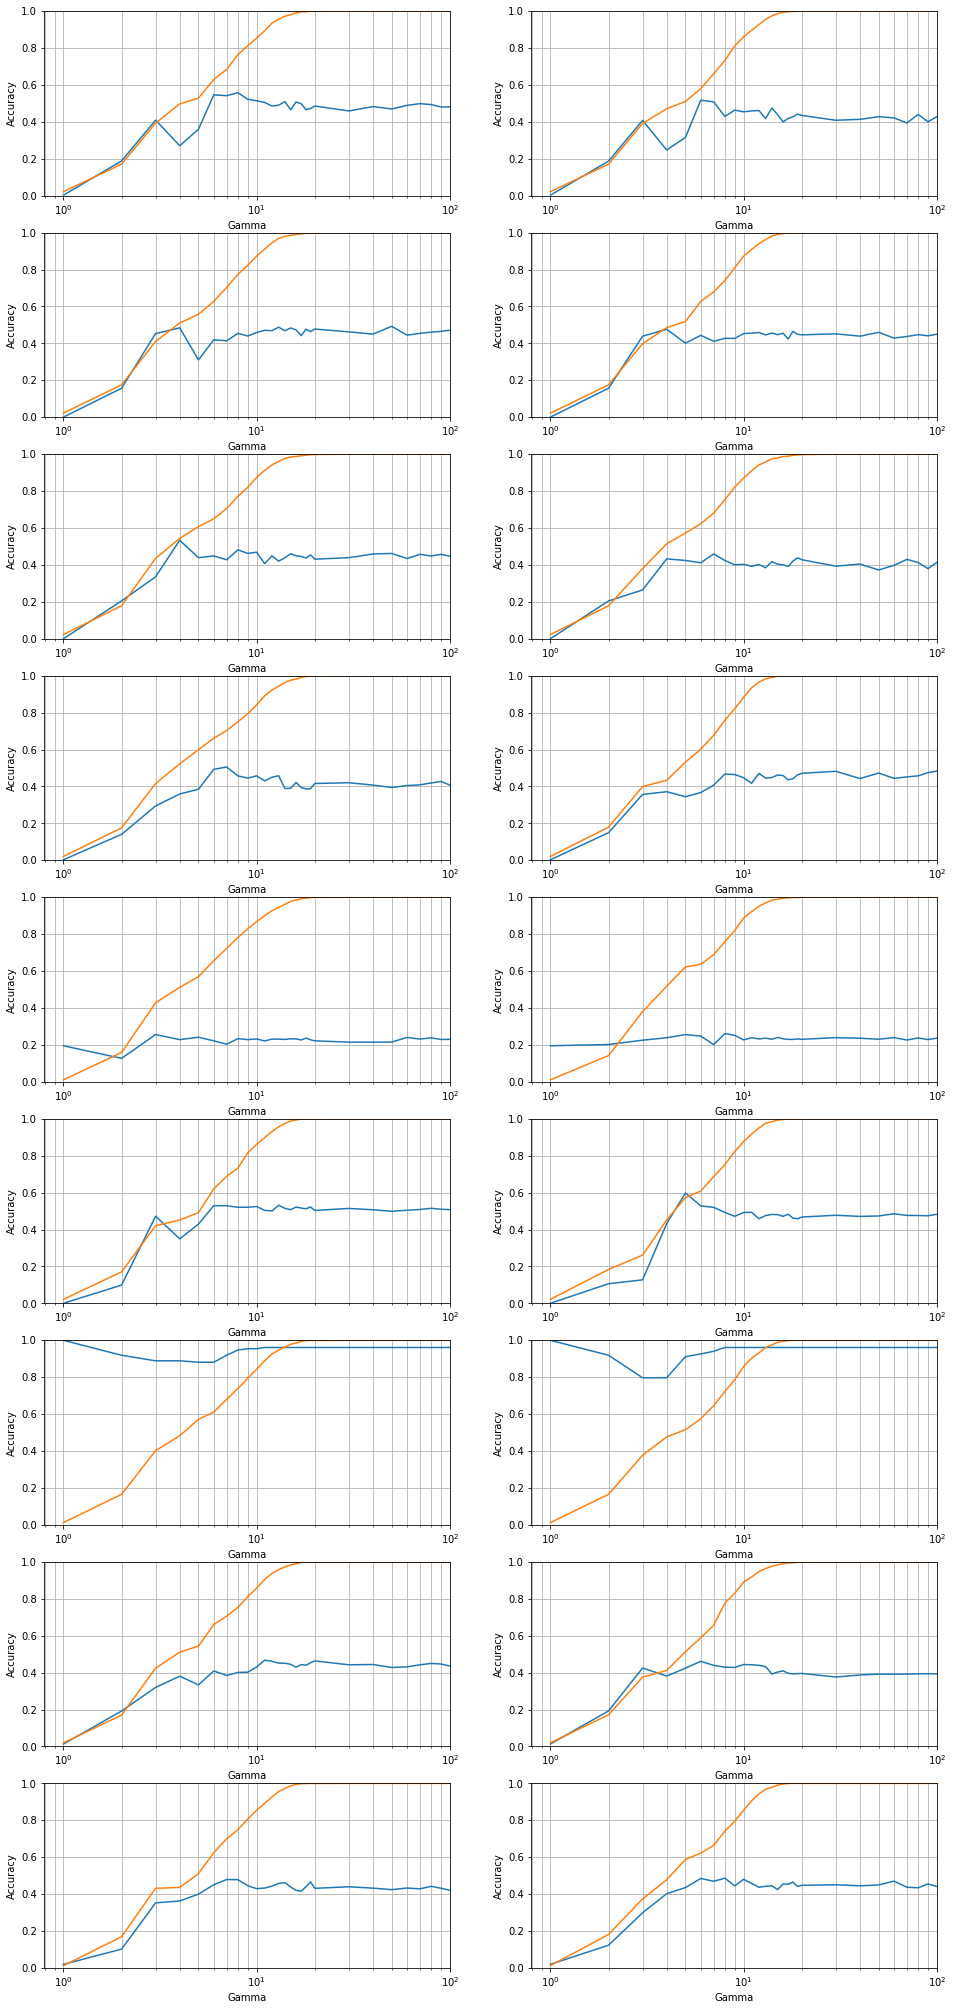

In [7]:
ListOfNumbers = [1, 2, 4, 5, 6, 7, 8, 9, 10]
test_data = well_number3

number = 0

hf, axes = plt.subplots(9, 2, figsize=(16, 36))
plt.grid(True, which="both")

for i in ListOfNumbers: 
    lst1, lst2, lst3, lst4, lst5, lst6, lst7, lst8, lst9, lst10, lst11 = [], [], [], [], [], [], [], [], [], [], []
    
    training_data = pd.DataFrame(list(zip(lst1, lst2, lst3, lst4, lst5, lst6, lst7, lst8, lst9, lst10, lst11))
                                 , columns =['Well Name', 'Facies', 'Formation', 'Depth', 'GR', 'ILD_log10',
                                             'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']) 
    List = ListOfNumbers.copy()
    List.remove(i)
    test_data = globals()['well_number' + str(i)]
    for j in List:
        training_data = pd.concat([training_data, globals()['well_number' + str(j)]])
        
    training_data = training_data.drop('Well Name', axis=1)
    test_data = test_data.drop('Well Name', axis=1)

    X_training = training_data.drop('Facies', axis=1)
    Y_training = training_data['Facies']

    X_test = test_data.drop('Facies', axis=1)
    Y_test = test_data['Facies']
    
    X_training['Depth'], X_training['Formation'] = pd.to_numeric(X_training['Depth']), pd.to_numeric(X_training['Formation'])
    X_training['GR'], X_training['PHIND'] = pd.to_numeric(X_training['GR']), pd.to_numeric(X_training['PHIND']) 
    X_training['ILD_log10'], X_training['DeltaPHI'] = pd.to_numeric(X_training['ILD_log10']), pd.to_numeric(X_training['DeltaPHI'])
    X_training['PE'], X_training['NM_M'] =  pd.to_numeric(X_training['PE']), pd.to_numeric(X_training['NM_M'])
    X_training['RELPOS'] = pd.to_numeric(X_training['RELPOS'])
    
    Y_training = pd.to_numeric(Y_training)
    
    X_test['Depth'], X_test['Formation'], X_test['GR'], X_test['ILD_log10'], X_test['DeltaPHI'], X_test['PHIND'], X_test['PE'], X_test['NM_M'], X_test['RELPOS'] = pd.to_numeric(X_test['Depth']), pd.to_numeric(X_test['Formation']), pd.to_numeric(X_test['GR']), pd.to_numeric(X_test['ILD_log10']), pd.to_numeric(X_test['DeltaPHI']), pd.to_numeric(X_test['PHIND']), pd.to_numeric(X_test['PE']), pd.to_numeric(X_test['NM_M']), pd.to_numeric(X_test['RELPOS'])
    Y_test = pd.to_numeric(Y_test)
    
    Robust = RobustScaler().fit(X_training)
    X_training = Robust.transform(X_training)
    X_test = Robust.transform(X_test)

    Standard = StandardScaler().fit(X_training)
    X_training = Standard.transform(X_training)
    X_test = Standard.transform(X_test)

    MinMax = MinMaxScaler().fit(X_training)
    X_training = MinMax.transform(X_training)
    X_test = MinMax.transform(X_test)
    
    a =  np.unique(Y_training)
    weights = compute_class_weight(class_weight='balanced', classes=a, y=Y_training)
    weights = dict(zip(np.unique(Y_training), weights))
    
    MaxDepth = np.array([None, 1, 2, 3, 4, 5, 6 , 7, 8, 9, 10,11,12,13,14,15,16,17,18,19 ,20, 30, 40, 50, 60, 70, 80, 90, 100])
    accuracy_test = np.ndarray([0])
    accuracy_train = np.ndarray([0])

    Criterion = ['gini','entropy']


    
    N_iter = 0

    for l in Criterion:
        for K in MaxDepth:
            Clf = DecisionTreeClassifier(criterion=l, max_depth=K, class_weight=weights)
            Clf.fit(X_training, Y_training)
            Y_Pred  = Clf.predict(X_test)
            y_pred = Clf.predict(X_training)
            accuracy_test = np.append(accuracy_test, f1_score(Y_test, Y_Pred, average='weighted'))
            accuracy_train = np.append(accuracy_train, f1_score(Y_training, y_pred, average='weighted'))
        
        ax = plt.subplot2grid((9, 2), (number,N_iter))
        ax.semilogx(MaxDepth,accuracy_test) 
        ax.semilogx(MaxDepth,accuracy_train) 
        plt.ylim([0,1])
        plt.xlim([0,100])
        plt.grid(True, which="both")
        plt.xlabel('Gamma')
        plt.ylabel('Accuracy')
        axes[N_iter][0].set_ylabel("accuracy")
        
        N_iter = N_iter + 1
        accuracy_test = np.ndarray([0])
        accuracy_train = np.ndarray([0])
         
    number = number + 1
    print(number)
    print('/////////////////////////////')
plt.show()


In [8]:
training_data = pd.concat([well_number1, well_number2, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9])
test_data = well_number3

In [9]:
training_data = training_data.drop('Well Name', axis=1)
test_data = test_data.drop('Well Name', axis=1)

X_training = training_data.drop('Facies', axis=1)
Y_training = training_data['Facies']

X_test = test_data.drop('Facies', axis=1)
Y_test = test_data['Facies']

In [10]:
Robust = RobustScaler().fit(X_training)
X_training = Robust.transform(X_training)
X_test = Robust.transform(X_test)

Standard = StandardScaler().fit(X_training)
X_training = Standard.transform(X_training)
X_test = Standard.transform(X_test)

MinMax = MinMaxScaler().fit(X_training)
X_training = MinMax.transform(X_training)
X_test = MinMax.transform(X_test)

In [11]:
a =  np.unique(Y_training)
weights = compute_class_weight(class_weight='balanced', classes=a, y=Y_training)
weights = dict(zip(np.unique(Y_training), weights))

In [12]:
Clf = DecisionTreeClassifier(criterion='gini', max_depth=7, class_weight=weights)
Clf.fit(X_training, Y_training)
Y_Pred  = Clf.predict(X_test)
well_number3['Prediction'] = Y_Pred
conf = confusion_matrix(Y_test, Y_Pred)
display_cm(conf, Y_test)

           Pred      SS      CSiS      FSiS      SiSh      MS      WS      D      PS      BS Total
           True
             SS       0        66        16         0       7       0      0       0       0    89
           CSiS       0        42        42         0       5       0      0       0       0    89
           FSiS       0        21        94         0       2       0      0       0       0   117
           SiSh       0         0         0         2       4       1      0       0       0     7
             MS       0         0         0        11       6       0      2       0       0    19
             WS       0         1         0         9      16      22      5      18       0    71
              D       0         0         0         0       8       0      0       5       4    17
             PS       0         0         0         1       5      16      0      12       6    40
             BS       0         0         0         0       0       0      0       0       0 

d:\texas_data_set\Regularize\classification_utilities.py:15: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(conf)/conf.sum(axis=0).astype('float')
d:\texas_data_set\Regularize\classification_utilities.py:16: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(conf)/conf.sum(axis=1).astype('float')
d:\texas_data_set\Regularize\classification_utilities.py:17: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


In [13]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
display_adj_cm(conf, Y_test, adjacent_facies)

           Pred      SS      CSiS      FSiS      SiSh      MS      WS      D      PS      BS Total
           True
             SS      66         0        16         0       7       0      0       0       0    89
           CSiS       0        84         0         0       5       0      0       0       0    89
           FSiS       0         0       115         0       2       0      0       0       0   117
           SiSh       0         0         0         6       0       1      0       0       0     7
             MS       0         0         0         0      17       0      2       0       0    19
             WS       0         1         0         9       0      61      0       0       0    71
              D       0         0         0         0       8       0      5       0       4    17
             PS       0         0         0         1       5       0      0      34       0    40
             BS       0         0         0         0       0       0      0       0       0 

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_19912\982180069.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
d:\texas_data_set\Regularize\classification_utilities.py:118: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(conf)/conf.sum(axis=1).astype('float')


In [14]:
conf = confusion_matrix(Y_test, Y_Pred)
print('Optimized facies classification accuracy = %.2f' % accuracy(conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(conf, adjacent_facies))

Optimized facies classification accuracy = 0.40
Optimized adjacent facies classification accuracy = 0.86


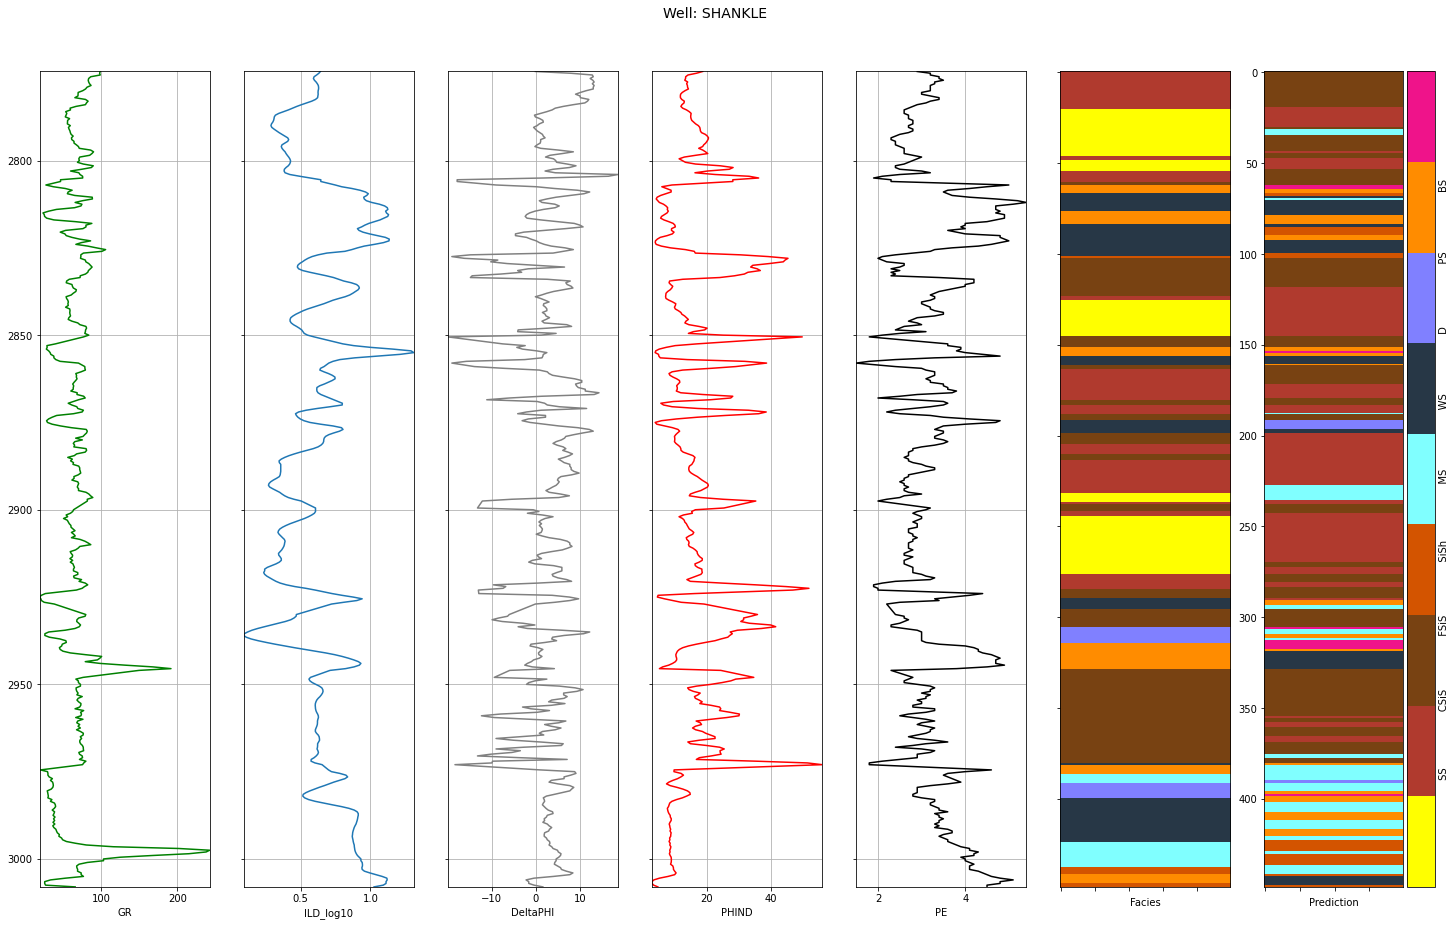

In [15]:
compare_facies_plot(well_number3, 'Prediction', test_data['Depth'].min(), test_data['Depth'].max())

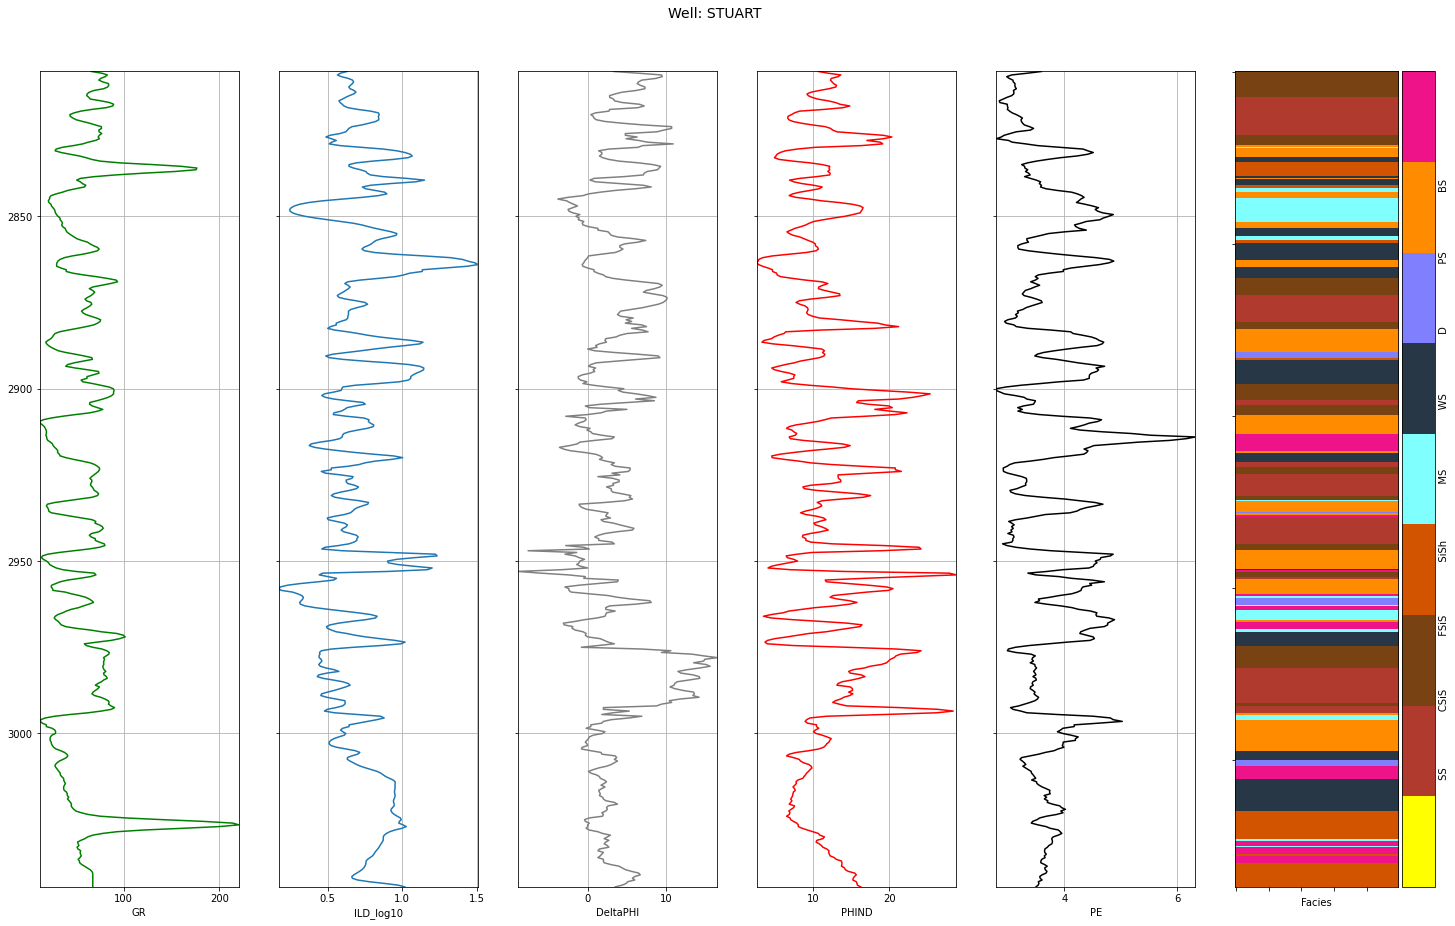

In [17]:
X_well11 = Robust.transform(well_number11.drop(['Well Name', 'Facies'], axis=1))
X_well11 = Standard.transform(X_well11)
X_well11 = MinMax.transform(X_well11)

Y_Pred  = Clf.predict(X_well11)
well_number11['Facies'] = Y_Pred
log_well(well_number11.sort_values("Depth"), well_number11['Depth'].min(), well_number11['Depth'].max())

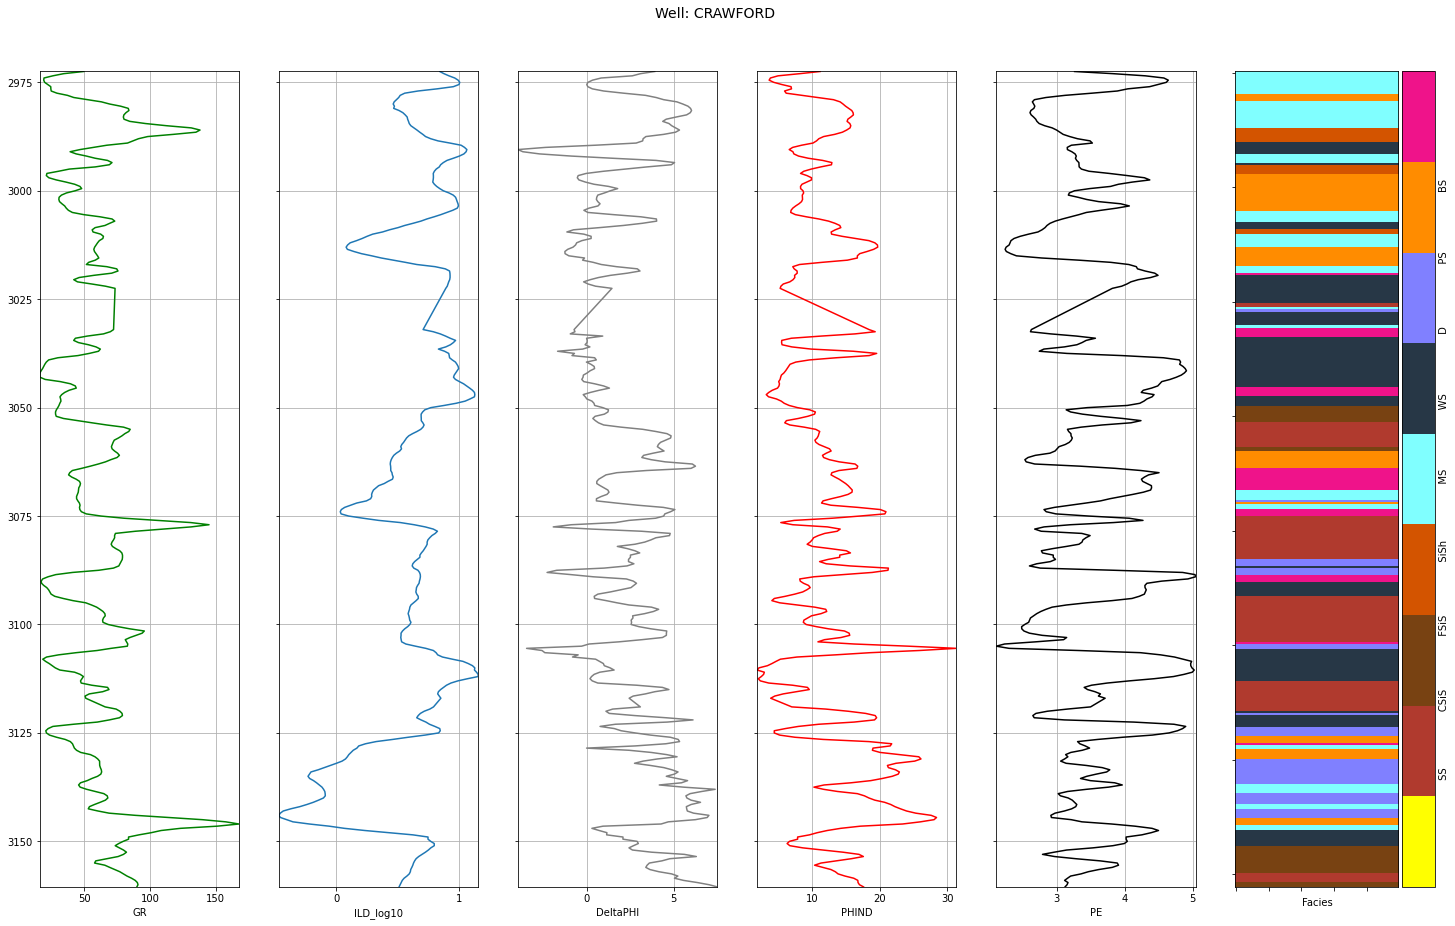

In [18]:
X_well12 = Robust.transform(well_number12.drop(['Well Name', 'Facies'], axis=1))
X_well12 = Standard.transform(X_well12)
X_well12 = MinMax.transform(X_well12)

Y_Pred  = Clf.predict(X_well12)
well_number12['Facies'] = Y_Pred
log_well(well_number12.sort_values("Depth"), well_number12['Depth'].min(), well_number12['Depth'].max())